In [1]:
import numpy as np
import matplotlib.pyplot as plt

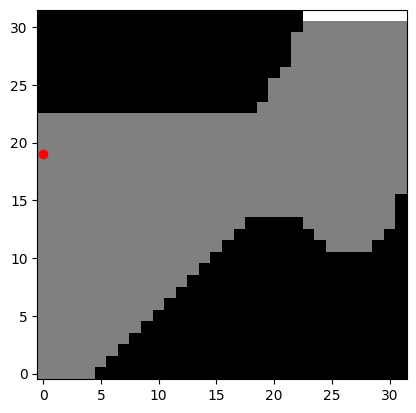

In [2]:
# solving car racing problem using monte carlo method reinforcement learning
# the car racing problem is a 5x5 grid, with the car starting in the bottom
# left corner, and the goal in the top right corner. The car can move up, down, left, or right 


# initialize the grid
grid = np.zeros((32,32))
# set the goal
# set the starting position down in random row
# grid[4,np.random.randint(0,5)] = 2
# set walls

grid[31, :] = [-1]*16 + [0]*(16-1) + [1]*1
grid[30, :] = [-1]*13 + [0]*(19-1) + [1]*1
grid[29, :] = [-1]*12 + [0]*(20-1) + [1]*1
grid[28, :] = [-1]*11 + [0]*(21-1) + [1]*1
grid[27, :] = [-1]*11 + [0]*(21-1) + [1]*1
grid[26, :] = [-1]*11 + [0]*(21-1) + [1]*1
grid[25, :] = [-1]*11 + [0]*(21-1) + [1]*1
grid[24, :] = [-1]*12 + [0]*(20-1) + [1]*1
grid[23, :] = [-1]*13 + [0]*(19-1) + [1]*1
grid[22, :] = [-1]*14 + [0]*(18-2) + [-1]*2
grid[21, :] = [-1]*14 + [0]*(18-5) + [-1]*5
grid[20, :] = [-1]*14 + [0]*(18-6) + [-1]*6
grid[19, :] = [-1]*14 + [0]*(18-8) + [-1]*8
grid[18, :] = [-1]*14 + [0]*(18-9) + [-1]*9
grid[17, :] = [-1]*13 + [0]*(19-9) + [-1]*9
grid[16, :] = [-1]*12 + [0]*(20-9) + [-1]*9
grid[15, :] = [-1]*11 + [0]*(21-9) + [-1]*9
grid[14, :] = [-1]*10 + [0]*(22-9) + [-1]*9
grid[13, :] = [-1]*9 + [0]*(23-9) + [-1]*9
grid[12, :] = [-1]*8 + [0]*(24-9) + [-1]*9
grid[11, :] = [-1]*7 + [0]*(25-9) + [-1]*9
grid[10, :] = [-1]*6 + [0]*(26-9) + [-1]*9
grid[9, :] = [-1]*5 + [0]*(27-9) + [-1]*9
grid[8, :] = [-1]*4 + [0]*(28-9) + [-1]*9
grid[7, :] = [-1]*3 + [0]*(29-9) + [-1]*9
grid[6, :] = [-1]*2 + [0]*(30-9) + [-1]*9
grid[5, :] = [-1]*1 + [0]*(31-9) + [-1]*9
grid[4, :] = [0]*(32-9) + [-1]*9
grid[3, :] = [0]*(32-9) + [-1]*9
grid[2, :] = [0]*(32-9) + [-1]*9
grid[1, :] = [0]*(32-9) + [-1]*9
grid[0, :] = [0]*(32-9) + [-1]*9



# plot the grid revers y-axis
plt.imshow(np.transpose(grid), cmap='gray')
plt.gca().invert_yaxis()
point = np.array([0, np.random.randint(0, 23), 0, 0])
plt.scatter(point[0], point[1], color='red')
# rotate fig 90 deg




plt.show()

In [19]:
class Race:
    def __init__(self, grid):
        self.reward = None
        self.grid = grid
        self.step_num = 0
        self.state = np.array([0, np.random.randint(0, 23), 0, 0])  # x y dx dy
        self.returns = {(i, j, k, l, m, n): [] for i in range(len(grid)) for j in range(len(grid)) for k in range(-5, 6)
                        for l in range(-5, 6) for m in range(-1, 2) for n in range(-1, 2)}
        self.Q = {(i, j, k, l, m, n): 0 for i in range(len(grid)) for j in range(len(grid)) for k in range(-5, 6) for l
                  in range(-5, 6) for m in range(-1, 2) for n in range(-1, 2)}
        # random policy
        self.policy = {(i, j, k, l): np.random.randint(-1, 2, size=2) for i in range(len(grid)) for j in
                       range(len(grid)) for k in range(-5, 6) for l in range(-5, 6)}

        self.epsilon = 0.5
        self.lambda_ = 0.99
        self.alpha = 0.1
        self.gamma = 0.9
        self.is_done = False
        self.visited_states = []

    def get_action(self):
        # greedy policy
        if np.random.uniform(0, 1) > self.epsilon:
            action = self.policy[self.state[0], self.state[1], self.state[2], self.state[3]] 
            # print Q
            print(self.Q[self.state[0], self.state[1], self.state[2], self.state[3], action[0], action[1]])
            return action
        else:
            return np.random.randint(-1, 2, size=2)

    def reset(self):
        self.state = np.array([0, np.random.randint(0, 23), 0, 0])  # x y dx dy
        self.is_done = False
        # self.returns = {(i, j, k, l, m, n): [] for i in range(len(grid)) for j in range(len(grid)) for k in range(-5, 6)
        #                 for l in range(-5, 6) for m in range(-1, 2) for n in range(-1, 2)}
        self.epsilon *= self.lambda_
        self.visited_states = []

    def step(self, action):
        # move the car
        self.state[0] += self.state[2]  # x + dx
        self.state[1] += self.state[3]  # y + dy
        self.state[2] += action[0]
        self.state[3] += action[1]
        # check velocity
        if self.state[2] > 2:
            self.state[2] = 2
        elif self.state[2] < -2:
            self.state[2] = -2
        if self.state[3] > 2:
            self.state[3] = 2
        elif self.state[3] < -2:
            self.state[3] = -2
        elif self.state[2] <= 0:
            self.state[2] = 1
        # check if the car is out of bounds
        if self.state[0] < 0:
            self.state[0] = 0
            self.state[2] = 0
        elif self.state[0] > len(self.grid) - 1:
            self.state[0] = len(self.grid) - 1
            self.state[2] = 0
        if self.state[1] < 0:
            self.state[1] = 0
            self.state[3] = 0
        elif self.state[1] > len(self.grid) - 1:
            self.state[1] = len(self.grid) - 1
            self.state[3] = 0
        # check if the car hit a wall
        if self.grid[self.state[0], self.state[1]] == -1:
            self.is_done = True
            self.reward = -100
        # check if the car hit the goal
        elif self.grid[self.state[0], self.state[1]] == 1:
            self.is_done = True
            self.reward = 100
        else:
            self.is_done = False
            self.reward = -1

        # plot grid with car
        plt.imshow(np.transpose(grid), cmap='gray')
        plt.gca().invert_yaxis()
        plt.scatter(self.state[0], self.state[1], color='red')
        # plt.show()
        # save fig in folder for gif in location png dir
        plt.title('step:' + str(self.step_num))
        plt.savefig('png_fig/' + str(self.step_num).zfill(5) + '.png')
        # close fig
        plt.close()

        self.step_num += 1

        print('State: ', self.state)
        return self.state, self.reward, self.is_done

    def play(self, episodes):
        for episode in range(episodes):
            # reset the car
            self.reset()
            # play the game
            while not self.is_done:
                # get the action
                action = self.get_action()
                # step the car
                # add state to visited states
                state = self.state
                _, reward, is_done = self.step(action)
                # if is_done:
                #     self.visited_states.append((state[0], state[1], state[2], state[3], action[0], action[1]))
                # add the reward to the returns
                self.returns[(state[0], state[1], state[2], state[3], action[0], action[1])].append(reward)
                self.visited_states.append((state[0], state[1], state[2], state[3], action[0], action[1]))
            # update the Q values from last episode to first
            for i in range(len(self.visited_states) - 1, -1, -1):
                # get the state and action
                state = self.visited_states[i]
                # get the reward mean
                # check nan
                if len(self.returns[state]) > 0:
                    reward_ = np.mean(self.returns[state])
                else:
                    reward_ = 0
                    print("Oooops")
                # update the Q value ---> Q = gamma*G + R_(t+1)
                if i == int(len(self.visited_states) - 1):
                    self.Q[state] = reward_
                else:
                    self.Q[state] = self.Q[self.visited_states[i + 1]] + reward_
                print(self.Q[state])

            # update the policy to be greedy to max Q from just visited states
            for state in self.visited_states:
                # get the max Q value
                max_Q = -100000
                # for every action
                for i in range(-1, 2):
                    for j in range(-1, 2):
                        # update Q
                        if self.Q[state[0], state[1], state[2], state[3], i, j] > max_Q:
                            max_Q = self.Q[state[0], state[1], state[2], state[3], i, j]
                            self.policy[state[0], state[1], state[2], state[3]] = np.array([i, j])
                        
                        
                
                        

            # print the policy
            print('Episode: ', episode)
            # print('Policy: ', self.policy)
            # print('Q: ', self.Q)
            # print('Returns: ', self.returns)
            # print('----------------------------------------')
            # reset the returns
            # self.returns = {(i, j, k, l, m, n): [] for i in range(len(grid)) for j in range(len(grid)) for k in
            #                 range(-5, 6) for l in range(-5, 6) for m in range(-1, 2) for n in range(-1, 2)}  # %%


In [20]:
# play the game
game = Race(grid)
game.play(50)

0
State:  [0 4 1 1]
0
State:  [1 5 1 2]
0
State:  [2 7 2 2]
State:  [4 9 2 2]
State:  [ 6 11  2  1]
State:  [ 8 12  2  2]
0
State:  [10 14  2  2]
0
State:  [12 16  1  1]
State:  [13 17  2  0]
State:  [15 17  2  0]
0
State:  [17 17  1  1]
0
State:  [18 18  1  0]
0
State:  [19 18  1 -1]
State:  [20 17  1 -2]
0
State:  [21 15  1 -2]
State:  [22 13  1 -2]
-100.0
-101.0
-102.0
-103.0
-104.0
-105.0
-106.0
-107.0
-108.0
-109.0
-110.0
-111.0
-112.0
-113.0
-114.0
-115.0
Episode:  0
State:  [ 0 10  1 -1]
0
State:  [1 9 1 0]
State:  [2 9 2 0]
State:  [4 9 2 1]
0
State:  [ 6 10  2  1]
0
State:  [ 8 11  1  1]
0
State:  [ 9 12  1  2]
0
State:  [10 14  2  1]
State:  [12 15  2  2]
State:  [14 17  1  2]
State:  [15 19  2  2]
0
State:  [17 21  2  2]
State:  [19 23  1  1]
State:  [20 24  2  0]
State:  [22 24  2  1]
State:  [24 25  1  1]
0
State:  [25 26  2  2]
State:  [27 28  1  2]
0
State:  [28 30  1  2]
State:  [29 31  1  0]
100.0
99.0
98.0
97.0
96.0
95.0
94.0
93.0
92.0
91.0
90.0
89.0
88.0
87.0
86.0
85

In [21]:
# make gif of the episodes
import imageio.v2 as imageio
import os
images = []
# ignore hidden files
for filename in sorted(os.listdir('png_fig/')):
    if filename.endswith('.png'):
        images.append(imageio.imread('png_fig/' + filename))        

# Save images as gif with 0.1 frame per second
imageio.mimsave('movie.gif', images, duration=500)



        
        

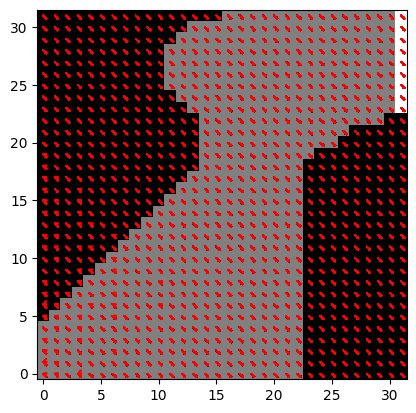

In [29]:
plt.imshow(grid, cmap='gray')
plt.gca().invert_yaxis()
# plot just for x and y and quiver for direction of ax, ay
for key in game.policy:
    plt.arrow(key[0], key[1], game.policy[key][0]/5, game.policy[key][1]/5, color='red', head_width=0.1)
    print(key[0], key[1], game.policy[key][0]/5, game.policy[key][1]/5)
    
plt.show()


In [41]:
plt.close()

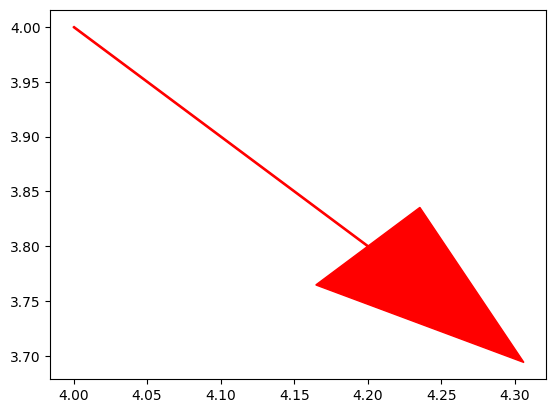

In [45]:
plt.arrow(key[0], key[1], game.policy[key][0]/5, game.policy[key][1]/5, color='red', head_width=0.1)
plt.show()